In [2]:
import torch
import math

from torch import optim
from torch import Tensor
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
import dlc_practical_prologue      
size=1000;
train_input, train_target, train_classes, test_input, test_target, test_classes = \
    dlc_practical_prologue.generate_pair_sets(size)
train_input, train_target, train_classes = Variable(train_input), Variable(train_target), Variable((train_classes))
test_input, test_target, test_classes = Variable(test_input), Variable(test_target), Variable(test_classes)
mini_batch_size = 10


9920512it [00:02, 3332823.37it/s]                                                                                      


Extracting ./data/mnist/MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 112621.46it/s]                                                                                         


Extracting ./data/mnist/MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:00, 1805017.35it/s]                                                                                      


Extracting ./data/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 40532.04it/s]                                                                                           


Extracting ./data/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


C:\Users\antho\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\antho\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\antho\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\antho\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


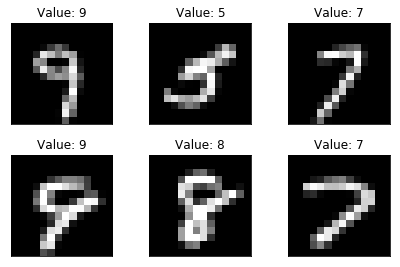

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_input[i][0], cmap='gray', interpolation='none')
  plt.title("Value: {}".format(train_classes[i][0]))  
  plt.tight_layout()
  plt.xticks([])
  plt.yticks([])